   Trial Number     value
0      1      1 -0.750615
1      1      1 -1.715070
2      1      1 -0.963404
3      1      1  0.360856
4      1      1 -1.190504


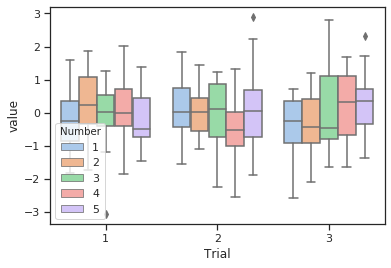

In [74]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

np.random.seed(44)
# DATAFRAMES WITH TRIAL COLUMN ASSIGNED
df1 = pd.DataFrame(np.random.randn(15,5), columns=list(range(1,6))).assign(Trial=1)
df2 = pd.DataFrame(np.random.randn(15,5), columns=list(range(1,6))).assign(Trial=2)
df3 = pd.DataFrame(np.random.randn(15,5), columns=list(range(1,6))).assign(Trial=3)

cdf = pd.concat([df1, df2, df3])                                # CONCATENATE
mdf = pd.melt(cdf, id_vars=['Trial'], var_name=['Number'])      # MELT

print(mdf.head())
#    Trial Number     value
# 0      1      1 -0.750615
# 1      1      1 -1.715070
# 2      1      1 -0.963404
# 3      1      1  0.360856
# 4      1      1 -1.190504

ax = sns.boxplot(x="Trial", y="value", hue="Number", data=mdf)  # RUN PLOT   
plt.show()

plt.clf()
plt.close()

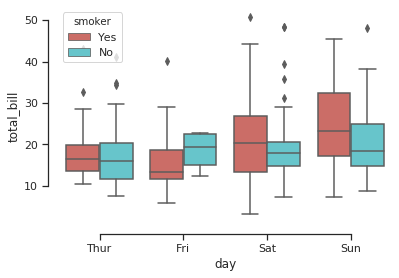

In [72]:
import seaborn as sns
sns.set(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
#            hue="directions", palette=["m", "g"],
            hue="smoker", palette=sns.color_palette("hls", 2),            
            data=tips)
sns.despine(offset=10, trim=True)

### Plot

In [283]:
import matplotlib.pyplot as plt 

# plots any number of image sets (in columns) of the IVIM model for a given slice 
def plot_ivim_params(im_sets, im_slice,mask,figsize=(15,15)): 
    plt.figure(figsize=figsize)
    keys = list(im_sets[0].keys())
    mask = mask.get_fdata()
    for i in range(len(im_sets)):
        for j,key in enumerate(keys):
            im = np.squeeze(im_sets[i][key].get_fdata())
            im[im<0] = 0 
            im = np.multiply(mask,im)
            # rescale 
            if i==2: 
                im = np.interp(im, (im.min(), im.max()), (0, +1)) 
#            if "D" in key: 
#                im = np.multiply(im,1000)
#            print("%s : %s"% (key,i))
#            print("min %0.02f, max %0.02f, mean %0.02f, std %0.02f " % (np.min(im), np.max(im), np.mean(im), np.std(im)))
            ax = plt.subplot2grid((4,3), (j,i))
            plt.imshow(im[:,:,im_slice],cmap='gray')
            plt.xticks([])
            plt.yticks([])  
            plt.title("")
    plt.subplots_adjust(wspace=0, hspace=0,left=0,right=1,bottom=0,top=1)

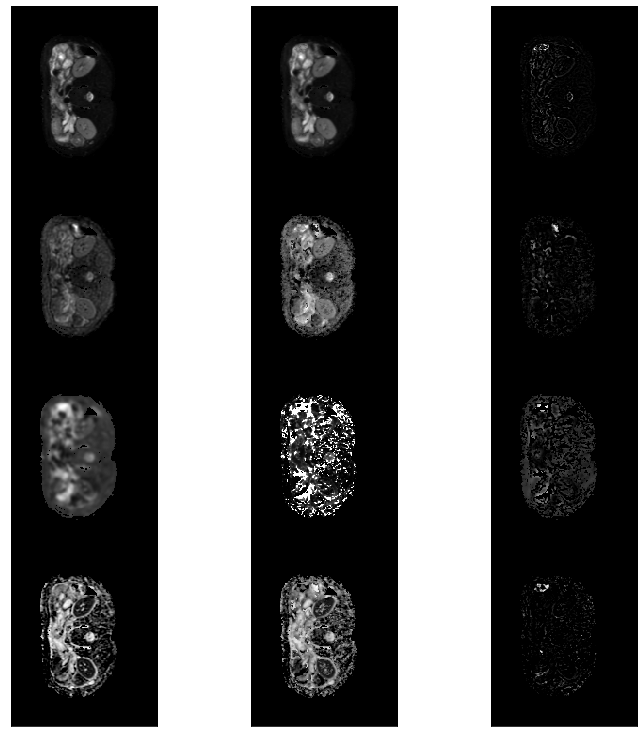

In [187]:
added = [roar_param_ims, dipy_param_ims, diff_params_ims]
plot_ivim_params(added, 20,mask,figsize=(10,10))

One way to plot a grid

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

fig = plt.figure(figsize=(15, 15))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 6),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )



for i, ax in enumerate(grid):
    # Iterating over the grid returns the Axes.
    if i<6:
        ax.imshow(val_echo4_slices[:,:,i], cmap='gray');
    else:
        ax.imshow(network_out_B200_im_t[:,:,i-6], cmap='gray');
        
plt.show()


In [ ]:
another way to plot subplots

In [ ]:
# plots any number of image sets (in columns) of the IVIM model for a given slice 
def plot_ivim_params2(im_sets, im_slice,mask,figsize=(15,15)): 
    keys = list(im_sets[0].keys())
    mask = mask.get_fdata()

    ncol = len(im_sets)
    nrow = len(keys)    
    plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(nrow, ncol, width_ratios=[1, 1, 1],
#                           wspace=0.0, hspace=0.0, left=0, right=0.4609) 
                           wspace=0.0, hspace=0.0, left=0, right=0.6999
                          )                            
    for i in range(ncol):
        for j,key in enumerate(keys):
            im = np.squeeze(im_sets[i][key].get_fdata())
            im[im<0] = 0 
            im = np.multiply(mask,im)
            im = im[:,:,im_slice]
            im = np.flip(im)
            im = np.rot90(im,1)
            
            ax = plt.subplot(gs[j,i])
            plt.imshow(im,cmap='gray')
            plt.xticks([])
            plt.yticks([])  

another way to plot subplots

In [ ]:
# """ Function to display row of image slices 
# Input: numpy 2D array"""
figsize=(15,15);
fig, axs = plt.subplots(2, len(slices),figsize=figsize);
for i in range(len(slices)):#, slice_ in enumerate(slices):
    axs[0][i].imshow(val_echo4_slices[:,:,i], cmap="gray", origin="lower");
    axs[1][i].imshow(network_out_B200_im_t[:,:,i], cmap="gray", origin="lower");


### T-test

Test a reference RoAR reconstrution with 6 geometrically averaged directions vs. RoAR reconstructions with smaller number of geometrically averaged directions.  

Assumptions:  
- two-tailed student's t-test 
- equal variance between the samples (because each geometric average assumes the same amount of inherent noise that is contributing to the averaging operation. Therefore the underlying distributions share the same variance, but different means). 



In [ ]:
        # t-test 
        t, p = ttest_ind(ref, alt, equal_var=True)

In [57]:
#numpy histogram
np.histogram(np.ravel(labels))

(array([1185475,       0,       0,    3831,       0,       0,    4098,
              0,       0,    4676]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]))

### Plot boxplots

In [39]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Boxplots via matplotlib (not seaborn)

In [255]:
left_positions = [-6,  -5,  -4, -3, -2, -1]
center_positions = [1, 2, 3,4,5,6]
right_positions = [7,8,9,10,11,12]

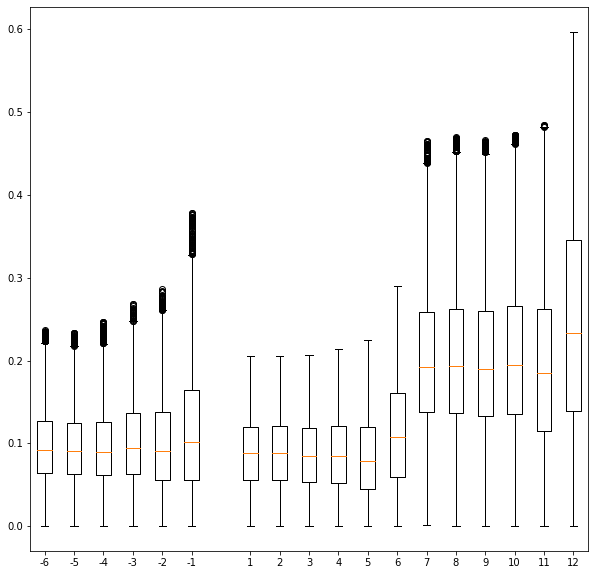

In [256]:
plt.figure(figsize=(10,10))
plt.boxplot(df['Kidneys'], positions = left_positions);
plt.boxplot(df['Spleen'], positions = center_positions);
plt.boxplot(df['Liver'], positions = right_positions);

# Comparing DIPY estimates to RoAR estimates 

In [247]:
def permute_slice_axis(im):
    return np.transpose(im,(1,2,0))

### Comparing means and estimates 

In [292]:
# SELECT A REGION which to plot 
x=(50,65)
y=(115,130)

Text(0.5, 1.0, 'S0 dipy')

Text(0.5, 1.0, 'ADC roar')

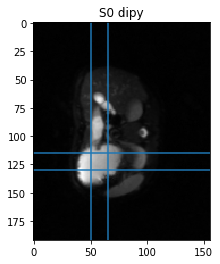

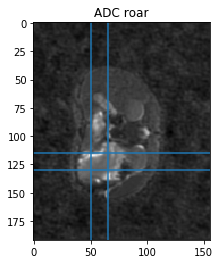

In [300]:
fig = plt.figure();
plt.title('S0 dipy')
plt.imshow(S0_dipy[:,:,2], cmap='gray');

plt.axhline(y=130)
plt.axvline(x=50)
plt.axhline(y=115)
plt.axvline(x=65)

fig = plt.figure();
plt.title('ADC roar')
plt.imshow(Dnn_dipy[:,:,2], cmap='gray');

plt.axhline(y=130)
plt.axvline(x=50)
plt.axhline(y=115)
plt.axvline(x=65)



In [301]:
S0_dipy.shape

(192, 156, 6)

In [302]:
x
y

(50, 65)

(115, 130)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'D dipy')

Text(0.5, 1.0, 'D dipy crop and add')

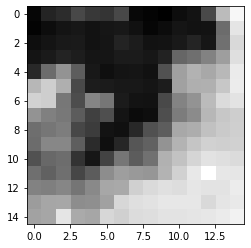

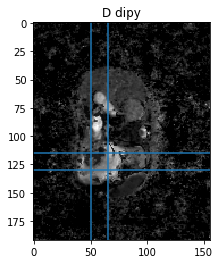

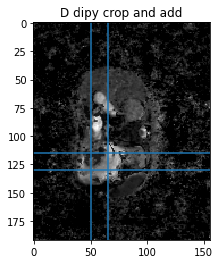

In [313]:
# S0_dipy = S0_dipy[:,:,val_slices]
# D_dipy = D_dipy[:,:,val_slices]
# P_dipy = P_dipy[:,:,val_slices]
# P_f_dipy = P_f_dipy[:,:,val_slices]

D_crop = D_dipy[y[0]:y[1], x[0]:x[1],2]

plt.figure()
plt.imshow(D_crop, cmap='gray')


D_dipy_new = np.copy(D_dipy)
D_dipy_new[y[0]:y[1], x[0]:x[1],2] = D_crop



fig = plt.figure();
plt.title('D dipy')
plt.imshow(D_dipy[:,:,2], cmap='gray');

plt.axhline(y=130)
plt.axvline(x=50)
plt.axhline(y=115)
plt.axvline(x=65)


fig = plt.figure();
plt.title('D dipy crop and add')
plt.imshow(D_dipy_new[:,:,2], cmap='gray');

plt.axhline(y=130)
plt.axvline(x=50)
plt.axhline(y=115)
plt.axvline(x=65)


In [316]:
def metrics(patch):
    m = np.mean(patch)
    s = np.std(patch)    
    maxx = np.max(patch)        
    minn = np.min(patch)
    med = np.median(patch)
    IQR = np.percentile(patch, 75) - np.percentile(patch, 25)
    
    

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1a6ddd46d8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1a6ddd4dd8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1a6ddd4588>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1a6dde14a8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1a6dde17f0>],
 'means': []}

Text(0.5, 1.0, 'S0 Dipy')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1a6dde1f98>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1a6dd796d8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1a6dde1e80>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1a6dd79d68>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1a6dd810f0>],
 'means': []}

Text(0.5, 1.0, 'ADC Dipy')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1a6dd817b8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1a6dd81e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1a6def8a90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1a6dd8a4e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1a6dd8a828>],
 'means': []}

Text(0.5, 1.0, 'Perf Dipy')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1a6dd8af28>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1a6dda05c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1a6dea7f60>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1a6dda0c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1a6dda0f98>],
 'means': []}

Text(0.5, 1.0, 'Perf Frac Dipy')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1a6dd266d8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1a6dd26d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1a6deaf080>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1a6dd32400>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1a6dd32748>],
 'means': []}

Text(0.5, 1.0, 'S0 RoAR')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1a6dd32e48>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1a6dd3d518>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1a6dee05f8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1a6dd3dba8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1a6dd3deb8>],
 'means': []}

Text(0.5, 1.0, 'ADC RoAR')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1a6dd4b5f8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1a6dd4bc88>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1a6ddd4470>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1a6dd54358>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1a6dd546a0>],
 'means': []}

Text(0.5, 1.0, 'Perf RoAR')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1a6dd54c50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1a6dce3400>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1a6dd26550>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1a6dce3a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1a6dce3dd8>],
 'means': []}

Text(0.5, 1.0, 'Perf Frac RoAR')

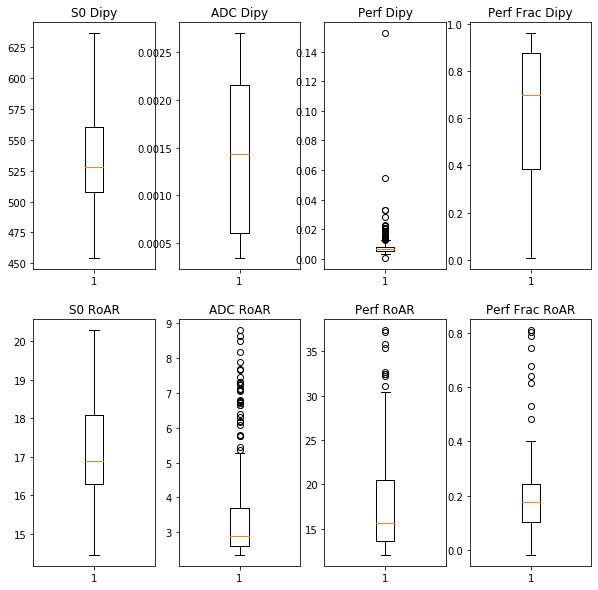

In [329]:
# plt.boxplot(np.ravel(S0_crop))
fig, axs = plt.subplots(2, 4,figsize=(10,10))

# basic plot
axs[0, 0].boxplot(np.ravel(S0_crop))
axs[0, 0].set_title('S0 Dipy')

axs[0, 1].boxplot(np.ravel(D_crop))
axs[0, 1].set_title('ADC Dipy')

axs[0, 2].boxplot(np.ravel(P_crop))
axs[0, 2].set_title('Perf Dipy')

axs[0, 3].boxplot(np.ravel(P_f_crop))
axs[0, 3].set_title('Perf Frac Dipy')


axs[1, 0].boxplot(np.ravel(S0nn_crop))
axs[1, 0].set_title('S0 RoAR')

axs[1, 1].boxplot(np.ravel(Dnn_crop))
axs[1, 1].set_title('ADC RoAR')

axs[1, 2].boxplot(np.ravel(Pnn_crop))
axs[1, 2].set_title('Perf RoAR')

axs[1, 3].boxplot(np.ravel(Pnn_f_crop))
axs[1, 3].set_title('Perf Frac RoAR')




plt.show()

In [ ]:
import matplotlib.pyplot as plt 
fig, axs = plt.subplots(3, 2,figsize=(15,15))
axs[0, 0].imshow(v[0][0,:,:,0],cmap='gray')
axs[0, 1].imshow(v[1][0,:,:],cmap='gray')
axs[1, 0].imshow(v[3][0,:,:,0],cmap='gray')
axs[1, 1].imshow(v[5][0,:,:,0],cmap='gray')
axs[2, 0].imshow(v[6][0,:,:],cmap='gray')
axs[2, 1].imshow(v[7][0,:,:,0],cmap='gray')
axs[0, 0].title.set_text('X')
axs[0, 1].title.set_text('mask')
axs[1, 0].title.set_text('noise_standardizer')
axs[1, 1].title.set_text('noise')
axs[2, 0].title.set_text('noisyB0')
axs[2, 1].title.set_text('noisyX')


## Multiple image DIPY model comparison

In [ ]:
def save_nii(data, name): 
    img = nb.Nifti1Image(data, np.eye(4))
    nb.save(img,name)

In [ ]:
import scipy.io as sio 
import numpy as np 
import os 
import configparser

# generate nifti for RoAR outputs and DIPY estimates that are directly comparable in ITKSNAP 
def generate_RoAR_n_DIPY_niftis(experiment_name, epoch):

    # define paths 
    roar_path = '/home/ch215616/code/RoAR/'
    dipy_path = '/home/ch215616/code/IVIM_basics_june_2020/all_cases/' #IVIM_ML DIPY model estimates 
    input_mat_path = roar_path+'MAT_files/' # input MAT files 
    roar_output_path = roar_path + "MAT_files/" + experiment_name + "/MAT/epoch_" + str(epoch) + "/"
    config_ini_path = roar_path + "MAT_files/" + experiment_name + "/source/config.ini" #training config params

    # change directory 
    os.chdir(roar_path)

    # get validation dataset name and slices 
    config = configparser.ConfigParser()
    config.read(config_ini_path)
    val_dataset = [int(x) for x in config['data']['val_pts'].split(',')][0] 
    val_slices = [int(x) for x in config["save_params"]["save_val_slices"].split(",")]
    # load validation dataset 
    val_mat = sio.loadmat(input_mat_path+str(val_dataset)+".mat")
    # extract validation case number 
    case = val_mat['case'][0]

    # load DIPY 
    dipy_path = dipy_path + str(case) + "/IVIM/" 
    S0_dipy,D_dipy,P_dipy,P_f_dipy = load_dipy(dipy_path)
    # get validation slices from dipy 
    S0_dipy = S0_dipy[:,:,val_slices]
    D_dipy = D_dipy[:,:,val_slices]
    P_dipy = P_dipy[:,:,val_slices]
    P_f_dipy = P_f_dipy[:,:,val_slices]

    # load RoAR output images 
    S0_roar,D_roar,P_roar,P_f_roar,B200_roar = load_roar(roar_output_path)

    # create save directory 
    savedir = "MAT_files/" + experiment_name+"/roar_vs_dipy/"
    if not os.path.exists(savedir):
        os.makedirs(savedir)

    # save niftis 
    save_nii(S0_dipy, savedir+"S0_dipy.nii")
    save_nii(S0_roar, savedir+"S0_roar.nii")
    save_nii(D_dipy, savedir+"D_dipy.nii")
    save_nii(D_roar, savedir+"D_roar.nii")
    save_nii(P_dipy, savedir+"P_dipy.nii")
    save_nii(P_roar, savedir+"P_roar.nii")
    save_nii(P_f_dipy, savedir+"P_f_dipy.nii")
    save_nii(P_f_roar, savedir+"P_f_roar.nii")
    save_nii(B200_roar, savedir+"B200_roar.nii")

    # trim original input MAT files to correct shape 
    B0 = val_mat['echos'][:,2:-2,val_slices,0]
    B200 = val_mat['echos'][:,2:-2,val_slices,3]
    B400 = val_mat['echos'][:,2:-2,val_slices,4] # roar erroneously exported the fifth echo, not fourth... 
    
    # save original input MAT files to nifti also 
    save_nii(B0, savedir+"B0_input.nii")
    save_nii(B200, savedir+"B200_input.nii")
    save_nii(B400, savedir+"B400_input.nii")    
    
    # convert all files into .nii.gz 
    for f in glob.glob(savedir+"*.nii"): 
        cmd=["gzip", f]
        subprocess.call(cmd)



# Useful gists

Compare two lists and remove values 

In [ ]:
# check that each folder contains averaged b-values and that the number of b-values is 7 (for Unet)

not_matching_bvals = []

for case in cases:
# check that each average file has 7 bvalues 
    bvals = len(os.listdir(case+"averages/"))
    if bvals!=7: 
        print("The directory \n%s\n has %s bvalues" %(case,bvals))
        print("removing from list")
        not_matching_bvals.append(case)
_ = [cases.remove(f) for f in not_matching_bvals]
del _ 

Compare two lists - alternative methods

In [63]:
check = [item in not_matching_bvals for item in cases]
ind = [i for i, val in enumerate(check) if val] 
del cases[ind[0]]

In [33]:
cases_clean = [case for case in cases if not case in missing_averages_dir]        
cases_clean = [case for case in cases_clean if not case in not_matching_bvals]

The directory /home/ch215616/code/IVIM_basics_june_2020/all_cases/Case059/ 
 has 9 bvalues
removing this directory from list


Subplots

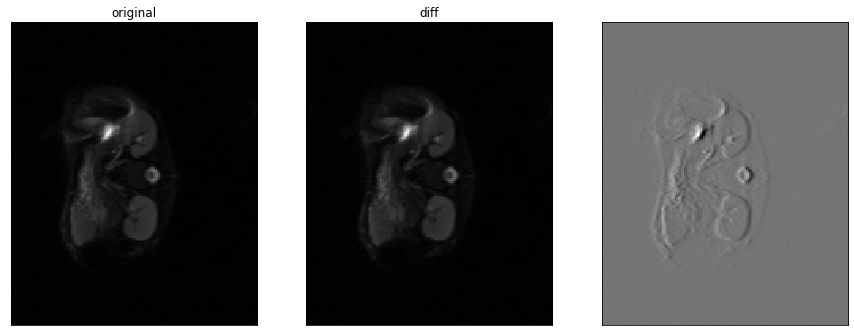

In [73]:
fig = plt.figure(figsize=(15,15))
original = fig.add_subplot(1,3,1)
original.set_title('original')
plt.imshow(original_nrrd[0][:,:,20],cmap='gray')
plt.xticks([]);plt.yticks([]);

saved = fig.add_subplot(1,3,2)
saved.set_title('saved_mat')
plt.imshow(b0_matched[:,:,20],cmap='gray')
plt.xticks([]);plt.yticks([]);

diff = fig.add_subplot(1,3,3)
saved.set_title('diff')
plt.imshow(original_nrrd[0][:,:,20]-b0_matched[:,:,20],cmap='gray')
plt.xticks([]);plt.yticks([]);


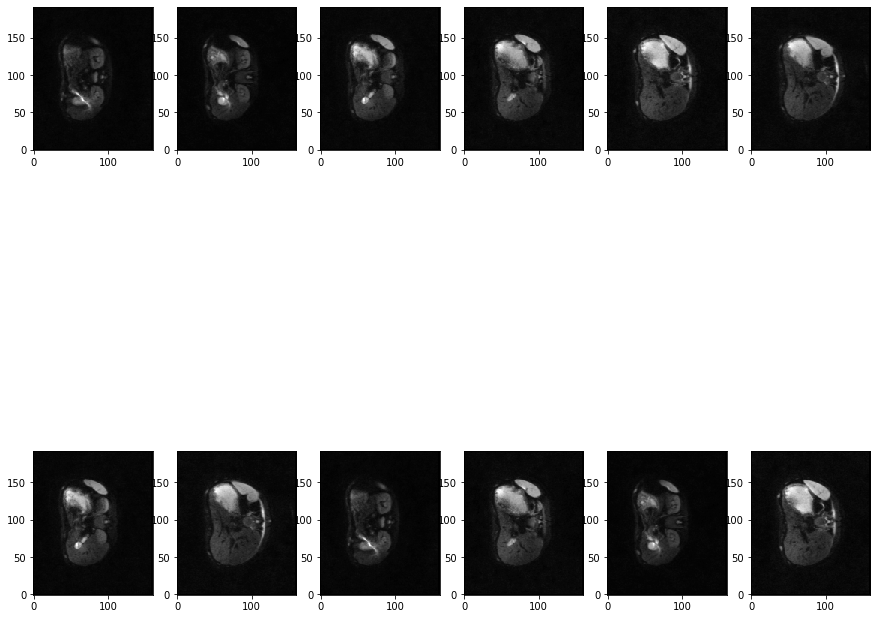

In [162]:
# """ Function to display row of image slices 
# Input: numpy 2D array"""
figsize=(15,15);
fig, axs = plt.subplots(2, len(slices),figsize=figsize);
for i in range(len(slices)):#, slice_ in enumerate(slices):
    axs[0][i].imshow(val_echo4_slices[:,:,i], cmap="gray", origin="lower");
    axs[1][i].imshow(network_out_B200_im_t[:,:,i], cmap="gray", origin="lower");


Histogram plots

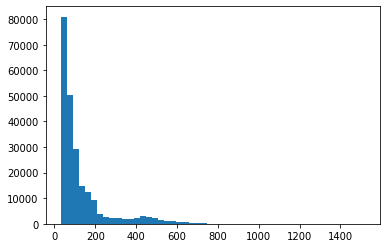

In [113]:
plt.figure();
plt.hist(np.ravel(b0_matched[b0_matched>30]),bins=50);

Plots with cross-hairs

Text(0.5, 1.0, 'S0 dipy')

Text(0.5, 1.0, 'ADC roar')

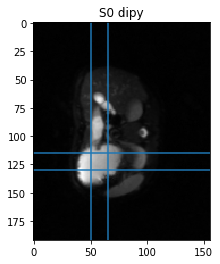

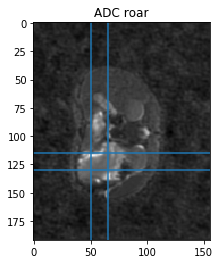

In [300]:
fig = plt.figure();
plt.title('S0 dipy')
plt.imshow(S0_dipy[:,:,2], cmap='gray');

plt.axhline(y=130)
plt.axvline(x=50)
plt.axhline(y=115)
plt.axvline(x=65)

fig = plt.figure();
plt.title('ADC roar')
plt.imshow(Dnn_dipy[:,:,2], cmap='gray');

plt.axhline(y=130)
plt.axvline(x=50)
plt.axhline(y=115)
plt.axvline(x=65)



Boxplots

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1a6ddd46d8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1a6ddd4dd8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1a6ddd4588>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1a6dde14a8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1a6dde17f0>],
 'means': []}

Text(0.5, 1.0, 'S0 Dipy')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1a6dde1f98>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1a6dd796d8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1a6dde1e80>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1a6dd79d68>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1a6dd810f0>],
 'means': []}

Text(0.5, 1.0, 'ADC Dipy')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1a6dd817b8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1a6dd81e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1a6def8a90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1a6dd8a4e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1a6dd8a828>],
 'means': []}

Text(0.5, 1.0, 'Perf Dipy')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1a6dd8af28>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1a6dda05c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1a6dea7f60>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1a6dda0c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1a6dda0f98>],
 'means': []}

Text(0.5, 1.0, 'Perf Frac Dipy')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1a6dd266d8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1a6dd26d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1a6deaf080>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1a6dd32400>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1a6dd32748>],
 'means': []}

Text(0.5, 1.0, 'S0 RoAR')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1a6dd32e48>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1a6dd3d518>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1a6dee05f8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1a6dd3dba8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1a6dd3deb8>],
 'means': []}

Text(0.5, 1.0, 'ADC RoAR')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1a6dd4b5f8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1a6dd4bc88>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1a6ddd4470>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1a6dd54358>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1a6dd546a0>],
 'means': []}

Text(0.5, 1.0, 'Perf RoAR')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1a6dd54c50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1a6dce3400>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1a6dd26550>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1a6dce3a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1a6dce3dd8>],
 'means': []}

Text(0.5, 1.0, 'Perf Frac RoAR')

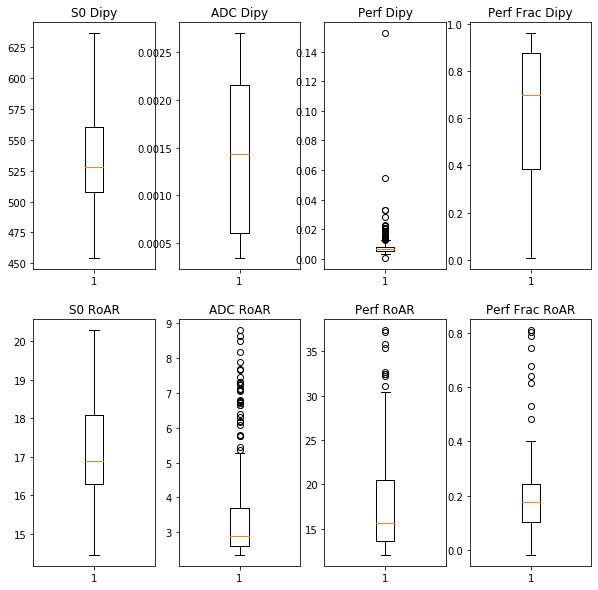

In [329]:
# plt.boxplot(np.ravel(S0_crop))
fig, axs = plt.subplots(2, 4,figsize=(10,10))

# basic plot
axs[0, 0].boxplot(np.ravel(S0_crop))
axs[0, 0].set_title('S0 Dipy')

axs[0, 1].boxplot(np.ravel(D_crop))
axs[0, 1].set_title('ADC Dipy')

axs[0, 2].boxplot(np.ravel(P_crop))
axs[0, 2].set_title('Perf Dipy')

axs[0, 3].boxplot(np.ravel(P_f_crop))
axs[0, 3].set_title('Perf Frac Dipy')


axs[1, 0].boxplot(np.ravel(S0nn_crop))
axs[1, 0].set_title('S0 RoAR')

axs[1, 1].boxplot(np.ravel(Dnn_crop))
axs[1, 1].set_title('ADC RoAR')

axs[1, 2].boxplot(np.ravel(Pnn_crop))
axs[1, 2].set_title('Perf RoAR')

axs[1, 3].boxplot(np.ravel(Pnn_f_crop))
axs[1, 3].set_title('Perf Frac RoAR')




plt.show()

   Trial Number     value
0      1      1 -0.750615
1      1      1 -1.715070
2      1      1 -0.963404
3      1      1  0.360856
4      1      1 -1.190504


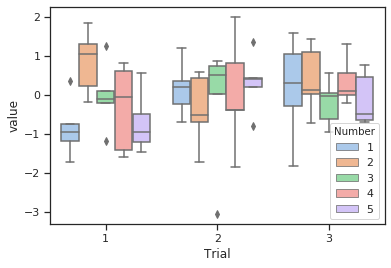

In [494]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

np.random.seed(44)
# DATAFRAMES WITH TRIAL COLUMN ASSIGNED
df1 = pd.DataFrame(np.random.randn(5,5), columns=list(range(1,6))).assign(Trial=1)
df2 = pd.DataFrame(np.random.randn(5,5), columns=list(range(1,6))).assign(Trial=2)
df3 = pd.DataFrame(np.random.randn(5,5), columns=list(range(1,6))).assign(Trial=3)

cdf = pd.concat([df1, df2, df3])                                # CONCATENATE
mdf = pd.melt(cdf, id_vars=['Trial'], var_name=['Number'])      # MELT

print(mdf.head())
#    Trial Number     value
# 0      1      1 -0.750615
# 1      1      1 -1.715070
# 2      1      1 -0.963404
# 3      1      1  0.360856
# 4      1      1 -1.190504

ax = sns.boxplot(x="Trial", y="value", hue="Number", data=mdf)  # RUN PLOT   
plt.show()

plt.clf()
plt.close()

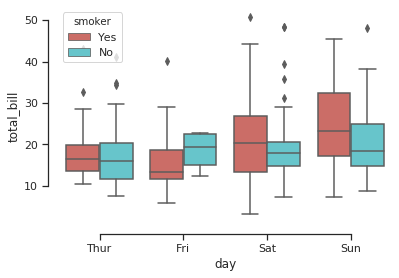

In [377]:
import seaborn as sns
sns.set(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
#            hue="directions", palette=["m", "g"],
            hue="smoker", palette=sns.color_palette("hls", 2),            
            data=tips)
sns.despine(offset=10, trim=True)

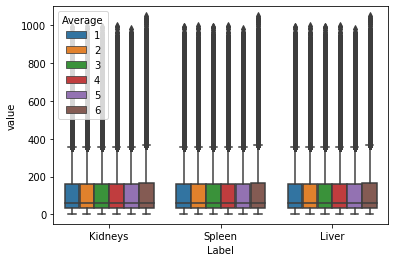

In [87]:
ivim_parameters = ['S0'] #assume only to plot 'S0' for now 
labels = {'Kidneys':1,'Spleen':1,'Liver':1} #assume one type of label for now 

for ivim_parameter in ivim_parameters: 
    df = dict.fromkeys(labels.keys()) # copy the keys of labels to a dataframe skeleton 
    for label_key, label in labels.items():     # iterate over kidney, spleen and liver 
        averages_masked = []
        for average in range(len(parameter_images)-1,-1,-1):  # iterate over 6 reconstruction averages in reverse order 
            im = parameter_images[average][ivim_parameter]
            im = mask_image(im,segmentation,label)
            # vectorize & select non-zero values
            im_v = np.ravel(im)
            im_v = im_v[im_v>0] 
            # add to averages_masked [WARNING: the order is in 6,5,4,3,2,1]
            averages_masked.append(im_v)
        # add to dataframe as array
        data = np.asarray(averages_masked)
        data = np.transpose(data)
        df[label_key] = pd.DataFrame(data, columns=list(range(1,6+1))).assign(Label=label_key)
    # add all measurements into a pandas data frame 
    df_list = [f for f in df.values()] # turn a dictionary into a list 
    boxplots_multiples(df_list)


Padding a numpy array

In [ ]:
npad = ((0, 0), (0, 0), (0, 4), (0,0)) # padding values to fix the size mismatch of the unet and our data (y-dimension)
data_array_nopad_addslice= np.pad(data_array_nopad, pad_width=npad, mode='constant', constant_values=0)


Permute dimensions

In [ ]:
network_out_B200_im_t = np.transpose(network_out_B200_im, (1, 2, 0))

Extract contents of a dictionary, ignoring the private variables

In [ ]:
for i,s in enumerate(slices): 
    # extract all images from .mat into a numpy array 
    slices_extracted.append([s[f] for f in s if not f.startswith('__')])

Find all files with extension X and sort in ascending order

In [ ]:
slices = [] 
files = glob.glob(fldr+"*.mat")

files = [os.path.basename(f) for f in files]
files.sort()

Load and save .nii

In [ ]:
import nibabel as nb 

im = nb.load('file.nii')

img_B200 = nb.Nifti1Image(B200, np.eye(4))
nb.save(img_S0,fldr+"S0.nii")

Load and save .nrrd 

In [ ]:
import nrrd 

im = nrrd.read('file.nrrd') 
nrrd.write(savename,data, header)


Load and save .mat 

In [ ]:
import scipy.io as sio 

im = sio.loadmat('file.mat')
savename = savedir+str(i+1)+".mat"
savedict = {'echos':images_4D_,'brainmsk':brainmsk, 'case':casename,'rootdir':case,'headers':headers,'bvalfilenames':bvalfilenames,'slicesTrimmed':slicesTrimmed}
sio.savemat(savename,savedict)

Split filename by slashes in the folder name 

In [ ]:
casename = case.split(sep='/')[-2]

Running shell command 

In [ ]:
import subprocess 

def convert_format(image, format_type='nii'): 
    crlConvertFormat="/opt/x86_64/pkgs/crkit/nightly/20170107/crkit/bin/crlConvertBetweenFileFormats"
    cmd = [crlConvertFormat, "-in", image, "-out", image.replace('nrrd', 'nii')]
    print("converting: %s to %s" %(image,format_type))
    subprocess.call(cmd)

 

In [ ]:
subprocess.check_output(cmd) # returns output - not necessary 
subprocess.call(cmd) #only return output command - if it was successful or not     

Open text file and print contents

In [ ]:
texts = glob.glob(d+"*.txt")
for text in texts: 
    with open(text, 'r') as f:
        file_contents = f.read()
        print(file_contents)

Check if items from one list exist in another list 

In [215]:
# print a boolean to check which item in a list does not exist in another
check = [item not in list1 for item in list2] 
#extract ID if true 
missing_case_ids = [i for i,f in enumerate(check) if f]
#print actual value of items 
missing_items = list( list2[i] for i in missing_case_ids)


        

NameError: name 'list2' is not defined

Easiest way to split path by slashes and extract the third folder name from the end (e.g. patient case number)

In [176]:
patient_id = [f.split('/')[-3] for f in fullpath]


[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True]

In [387]:
# get source code for a function 
import inspect 
inspect.getsourcelines(get_p_vals)


(['def get_p_vals(param_set1, param_set2,labels):\n',
  '    p_vals = dict.fromkeys(param_set1.keys()) # copy the keys from param_set \n',
  '    for key in param_set1.keys(): \n',
  '        # fetch data from reference (6directions)\n',
  '        ref = param_set1[key].get_fdata() \n',
  '        ref = np.squeeze(ref)\n',
  '        ref = np.multiply(ref,labels)     # multiply by mask to get only the labels \n',
  '        ref = np.ravel(ref[ref>0])        # select all non-zero values and flatten\n',
  '\n',
  '        # fetch data from comparison reconstruction (X directions)        \n',
  '        alt = param_set2[key].get_fdata()\n',
  '        alt = np.squeeze(alt)        \n',
  '        alt = np.multiply(alt,labels)     # multiply by mask to get only the labels         \n',
  '        alt = np.ravel(alt[alt>0])        # select all non-zero values and flatten\n',
  '        \n',
  '        # t-test \n',
  '        t, p = ttest_ind(ref, alt, equal_var=True)\n',
  '        # check s

In [ ]:
# time a piece of code 
import time 
start_time = timeit.default_timer()
#code block to time 
elapsed = timeit.default_timer() - start_time

In [ ]:
# check suffix of a string 
if f.endswith('.nrrd'): 
    print('NRRD')

Barcharts in matplotlib

In [ ]:
#simple 
import numpy as np
import matplotlib.pyplot as plt

data = [[5., 25., 50., 20.],
  [4., 23., 51., 17.],
  [6., 22., 52., 19.]]

X = np.arange(4)
plt.bar(X + 0.00, data[0], color = 'b', width = 0.25)
plt.bar(X + 0.25, data[1], color = 'g', width = 0.25)
plt.bar(X + 0.50, data[2], color = 'r', width = 0.25)

plt.show()




#better
import numpy as np
import matplotlib.pyplot as plt

data = [[5., 25., 50., 20.],
  [4., 23., 51., 17.],
  [6., 22., 52., 19.]]

color_list = ['b', 'g', 'r']
gap = .8 / len(data)
for i, row in enumerate(data):
  X = np.arange(len(row))
  plt.bar(X + i * gap, row,
    width = gap,
    color = color_list[i % len(color_list)])

plt.show()

Change size of current figure 

In [ ]:
# current figure (already plotted)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

# figure to be plotted 
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

Built-ins

In [ ]:
vars(object) # returns __dict__ of a class
arange(start,end) 

set()
tuple()
dict()
list()

next()
iter()

isinstance(variable,class)  #e.g. isinstance(0,str)

mydict = {'key':'value'}
mydict.keys()
mydict.values()
mydict.items()

## T1/T2 project 

dofmat

In [ ]:
#fetch affine matrix from dof file 
def dof2mat(dof):
    # irtk dof2mat function 
    cmd = " ".join(["dof2mat", dof]) 
    out = shell(cmd,stdout=False, stderr=False, stdout_save=True)
    
    # parse output 
    out = out.replace('irtkMatrix 4 x 4\n         ','')
    out = out.replace('\n','')
    out = re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", out)
    
    #reshape as 4x4 affine matrix 
    out = np.array(out).astype('float')
    out = np.reshape(out,(4,4))
    return out   

Euler to Rot (Matrix)

In [ ]:
import math 
# Calculates Rotation Matrix given euler angles.
def eulerAnglesToRotationMatrix(theta) :
     
    R_x = np.array([[1,         0,                  0                   ],
                    [0,         math.cos(theta[0]), -math.sin(theta[0]) ],
                    [0,         math.sin(theta[0]), math.cos(theta[0])  ]
                    ])
         
         
                     
    R_y = np.array([[math.cos(theta[1]),    0,      math.sin(theta[1])  ],
                    [0,                     1,      0                   ],
                    [-math.sin(theta[1]),   0,      math.cos(theta[1])  ]
                    ])
                 
    R_z = np.array([[math.cos(theta[2]),    -math.sin(theta[2]),    0],
                    [math.sin(theta[2]),    math.cos(theta[2]),     0],
                    [0,                     0,                      1]
                    ])
                     
                     
    R = np.dot(R_z, np.dot( R_y, R_x ))
 
    return R
# Checks if a matrix is a valid rotation matrix.
def isRotationMatrix(R) :
    Rt = np.transpose(R)
    shouldBeIdentity = np.dot(Rt, R)
    I = np.identity(3, dtype = R.dtype)
    n = np.linalg.norm(I - shouldBeIdentity)
    return n < 1e-6
 
 
# Calculates rotation matrix to euler angles
# The result is the same as MATLAB except the order
# of the euler angles ( x and z are swapped ).
def rotationMatrixToEulerAngles(R) :
 
    assert(isRotationMatrix(R))
     
    sy = math.sqrt(R[0,0] * R[0,0] +  R[1,0] * R[1,0])
     
    singular = sy < 1e-6
 
    if  not singular :
        x = math.atan2(R[2,1] , R[2,2])
        y = math.atan2(-R[2,0], sy)
        z = math.atan2(R[1,0], R[0,0])
    else :
        x = math.atan2(-R[1,2], R[1,1])
        y = math.atan2(-R[2,0], sy)
        z = 0
 
    return np.array([x, y, z])

File handling in python

In [ ]:
%%writefile my_new_file.txt
ONE ON FIRST
TWO ON SECOND
THREE ON THIRD

with open('my_new_file.txt', 'mode='r') as f:
    print(f.read())

with open('my_new_file.txt', 'mode='a') as f:
    print(f.write('\nFOUR ON FOURTH'))

with open('my_new_file.txt', 'mode='a') as f:
    print(f.write('\nFOUR ON FOURTH'))

with open('asdfadsfag.txt', 'mode='w') as f:
    f.write('I CREATED THIS FILE!')

with open('asdfadsfag.txt', 'mode='r') as f:
    print(f.read())

Add slash to end if not present 

In [ ]:
string = string+'/' if string[-1:]!='/' else string


Ipython magic 

In [ ]:
#list magic 
%lsmagic 

#execute shell 
! ls

#run bash file 
%%bash 

#execute python code from .py files 
%run

#list directories only 
%ldir 

# pretty list of current dir 
%ll

Shell Wrapper

In [ ]:
# helper function for running shell commands 
def shell(command,stdout=True,stderr=True,verbose=False, stdout_save=False):
    c = command.split(' ')
    p = subprocess.Popen(c, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    out = p.stdout.read()
    err = p.stderr.read()
    if stdout: 
        print(out.decode('utf-8'))
    if stderr:
        print(err.decode('utf-8'))
    if verbose: 
        print('\n%s'%command)
    if stdout_save: 
        return out.decode('utf-8')

IRTK wrap methods

In [ ]:
# IRTK python wrappers 
def dofprint(dof_path): 
    cmd = " ".join(["dofprint", dof_path])
    shell(cmd, stdout=True, stderr=False)
def transformation(source, output,dofin): 
    cmd = " ".join(["transformation",source,output,"-sinc","-dofin", dofin])
    shell(cmd,verbose=False,stdout=False,stderr=False)
    # e.g. transformation $v1_f ${v1_f/.nii/_${t_dof/.dof/}.nii} -sinc -dofin $d/$t_dof
def rreg(target, source, parin, dofout):
    cmd = " ".join(["rreg",target,source,"-parin",parin, "-dofout", dofout])
    shell(cmd,verbose=False,stdout=False,stderr=False)
    # e.g. rreg $v1 $f11_t_only -parin $parout -dofout ${f11_t_only/.nii.gz/_rreg.dof}
def dofinvert(dofin,dofout): 
    cmd = " ".join(["dofinvert",dofin, dofout])
    shell(cmd,verbose=False,stdout=False,stderr=False)

Jupyter images 

In [ ]:
#from absolute path
from IPython.display import Image
Image('/vol/medic02/users/sv407/my/ml/motion_sim/img/test_image_brain.jpg')

#from subdirectory
Image('img/test_image_brain.jpg', width=2500)

#from web
webpath='https://i.ytimg.com/vi/j22DmsZEv30/maxresdefault.jpg'
Image(webpath, width=800, unconfined=True)

#with markdown 
`![title](img/test_image_brain.jpg)`

#with markdown HTML 
`<img src="img/test_image_brain.jpg" width="250" height="250">`

Display variables' contents without a print function (jupyter)


In [ ]:
#pretty display of variables (aka no need to print func)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Retrieve variable name 

In [ ]:
import inspect


def retrieve_name(var):
        """
        Gets the name of var. Does it from the out most frame inner-wards.
        :param var: variable to get name from.
        :return: string
        """
        for fi in reversed(inspect.stack()):
            names = [var_name for var_name, var_val in fi.frame.f_locals.items() if var_val is var]
            if len(names) > 0:
                return names[0]

Sub base 


In [ ]:
# substitute base of a filepath with another base, while keeping the filename
def sub_base(fullpath,newbase): 
    head,tail = os.path.split(fullpath)
    newpath = newbase+'/'+tail
    return newpath 

Exit if file does not exist 

In [ ]:
#if file doesn't exist - interrupt the program 
import sys
import os 
def check_exists(path): 
    if not os.path.isfile(path):
        sys.exit('%s does NOT exist\n\n\n'%path)

Fetch file IDs 

In [ ]:
example = 'sub-CC00434AN14_ses-127700'

# fetch IDs of the subject names 
import re 
def find_ids(mylist):
    ids = [] 
    for i in mylist:
        ids.append(re.search(r'sub-[a-zA-Z]+[0-9]+[a-zA-Z]+[0-9]+_ses-[0-9]+',i).group())
    return ids 

Compare two lists 

In [ ]:
# get matching list 
all_files_less_large_files = [f for f in find_ids(files) if f not in large_files_ids]

File copying 

In [ ]:
from shutil import copyfile
copyfile(source,destination)


Concatenated 3 png images side by side into a single PNG for processing 

In [ ]:
import cv2
import numpy as np
import glob
import argparse 
import os

# parse cmd in

# parser = argparse.ArgumentParser(formatter_class=argparse.ArgumentDefaultsHelpFormatter)
# parser.add_argument('--im1', type=str)
# parser.add_argument('--im2', type=str)
# parser.add_argument('--im3', type=str)
# parser.add_argument('--savename', type=str)
# opt = parser.parse_args()

# set output name 
out = savename+'.png'
# read images
img1 = cv2.imread(im1)
img2 = cv2.imread(im2)
img3 = cv2.imread(im3)
print(type(img1))
# concat 
imgs = np.concatenate((img1, img2,img3), axis=1)
# save
cv2.imwrite(out, imgs)


## Nifti plot tools 

Imported from T1/T2 project 

In [ ]:
import matplotlib.pyplot as plt
import nibabel as nb 
import os 
import numpy as np 
from niwidgets import NiftiWidget


def show_slices(slices,figsize=(15,15)):
    """ Function to display row of image slices 
    Input: numpy 2D array"""
    fig, axes = plt.subplots(1, len(slices),figsize=figsize)
    for i, slice_ in enumerate(slices):
        axes[i].imshow(slice_.T, cmap="gray", origin="lower")

def plot_nii_slice(nii):
    if hasattr(nii,"get_fdata"): 
        s = nii.get_f_data()
    else:
        filename = nii
        if not os.path.isfile(filename):
            raise OSError("File "+filename+"\n not found.")
        s_obj = nb.load(str(filename))
        s = s_obj.get_fdata()
    if len(s.shape)>2: 
        if not s.shape[2]==1:
            raise OSError("File "+filename+"\n is a volume, not a slice")
        s = np.squeeze(s)
    plt.imshow(s,cmap='gray')

def plot_nii(img):
    """img could be a path to .nii or a nibabel object"""
    widget = NiftiWidget(img)
    widget.nifti_plotter(colormap='gray')

## Niftis 

Save nifti

In [ ]:
def save_nii(img_array,img_affine,img_header,savename): 
    img_object = nb.Nifti1Image(img_array,img_affine,header=img_header)
    img_object.to_filename(savename)

##  Underscore methods 

In [ ]:
#get module path 
import module 
module.__file__ 

#get function methods (non inherited) 
from module import function 
function.__dict__
#get function methods (inc inherited) 
dir(function)

#get name of a function as a str
function.__name__ 

hasattr(object,'attribute') not finished 
getattr() not finished 

## String methods 

From T1/T2 project

In [ ]:
str.endswith('.txt')

" ".join(['hello','world'])

str.replace('old','new')


str.split(" ") # split string by specified separator and return list 

str.find("pattern") #returns place where pattern started NB if multiple match - returns list 


# split string into list of floating numbers (e.g. when copying output from numpy array in jupyter) 
string = '5.38 5.41 5.57 5.82 5.63 6.24 6.28 6.37 6.51 6.65 6.47 6.09 5.29 5.21 5.1  5.85 5.48 5.84 5.54 5.51'
string2list = [float(i) for i in string.split()]

## Basic py lists etc

Continue, break

In [55]:
a = list(range(0,25))
for i in range(0,10): 
    a.pop(-1)
    if i==2:
        a.insert(1,55)
    elif i==3: 
        a.insert(1,1055)
    elif i==5: 
        break    #fully stop the for loop on iteration 5 
a 

24

23

22

21

20

19

[0, 1055, 55, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [56]:
for i in "this is awesome":
    if i == "i":
        continue  #skip the remaining of the for loop on all the i's
    print(i)

t
h
s
 
s
 
a
w
e
s
o
m
e


Lists 

In [64]:
L = list(range(1,8))
L

L.insert(2,50)  #insert in a list 
L

L.pop(-1)      #take off the last item and return it 
L          

L.insert(2,3)  
L

L.index(3)   #only returns first index of a value 

L.remove(3)  #removes value of zero (only the first occurence of it)
L

L.append(0.9595)
L

sorted(L)   # temporarily return the sorted list 
L
L.sort(reverse=True)    #sort the list for 'good' in reverse order
L

L.insert(2,50)
L.count(50)  #count how many 50s

[1, 2, 3, 4, 5, 6, 7]

[1, 2, 50, 3, 4, 5, 6, 7]

7

[1, 2, 50, 3, 4, 5, 6]

[1, 2, 3, 50, 3, 4, 5, 6]

2

[1, 2, 50, 3, 4, 5, 6]

[1, 2, 50, 3, 4, 5, 6, 0.9595]

[0.9595, 1, 2, 3, 4, 5, 6, 50]

[1, 2, 50, 3, 4, 5, 6, 0.9595]

[50, 6, 5, 4, 3, 2, 1, 0.9595]

2

Tuples 

In [66]:

x,y,z = (5,6,7) #tuples can be used to unpack items! 
x
y


5

6

## Numpy


In [1]:
import numpy as np

In [ ]:
# rescale 
im = np.interp(im, (im.min(), im.max()), (0, +1))

In [80]:
# numpy advanced slicing 
a = np.reshape(np.arange(0,25), (5,5))
a 
a[2:4,0:2]
a[[range(1,5)],[range(1,5)]]
a[[1,-1],1:3]

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

array([[10, 11],
       [15, 16]])

array([[ 6, 12, 18, 24]])

array([[ 6,  7],
       [21, 22]])

In [74]:
# python advanced slicing 
a = "/fileserver/abd/AllCases_Batch2/InterBvalAdded/Case132/MDDW_UPPER/"
a[1:-2:3]

'ferrbACeBc/tBld/s3MWP'

In [112]:
a = np.random.randint(0,5,(10,5)) #create 10x5 array with random integer values between 0 and 5 
a
np.random.rand(1,3,5) # generate absolutely random values on a scale of 0 to 1 
a.size
a.reshape(1,a.size) # reshaping into 1D array 

b = np.full_like(a,1) # make b as a copy of a
b

array([[0, 3, 2, 3, 3],
       [1, 2, 1, 0, 3],
       [4, 0, 2, 2, 2],
       [0, 0, 3, 4, 4],
       [4, 3, 3, 0, 4],
       [2, 4, 0, 1, 2],
       [1, 2, 3, 2, 2],
       [1, 2, 4, 1, 0],
       [1, 3, 1, 3, 1],
       [2, 0, 2, 1, 4]])

array([[[0.35955454, 0.78660419, 0.1992166 , 0.74348863, 0.05291789],
        [0.38360384, 0.01040411, 0.00584516, 0.29377115, 0.76150517],
        [0.66480251, 0.02325678, 0.29759463, 0.25168616, 0.2116639 ]]])

50

array([[0, 3, 2, 3, 3, 1, 2, 1, 0, 3, 4, 0, 2, 2, 2, 0, 0, 3, 4, 4, 4, 3,
        3, 0, 4, 2, 4, 0, 1, 2, 1, 2, 3, 2, 2, 1, 2, 4, 1, 0, 1, 3, 1, 3,
        1, 2, 0, 2, 1, 4]])

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]])

In [125]:
np.identity(5) # equivalent to np.eye 
np.eye(5)
a[1:5,4]
np.repeat(a[1:5,4],3,axis=0)  # repeat something N times along a particular direction 
np.eye(2)
c = np.repeat(np.eye(2),2,axis=1) 
c
c.shape

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

array([3, 2, 4, 4])

array([3, 3, 3, 2, 2, 2, 4, 4, 4, 4, 4, 4])

array([[1., 0.],
       [0., 1.]])

array([[1., 1., 0., 0.],
       [0., 0., 1., 1.]])

(2, 4)

In [132]:
a = np.random.rand(3,2)
a 
b = a 
b[1,:] = 5  
b
a

# deep copy 
a = np.random.rand(3,2)
b = a.copy()
b[1,:] = 5 
b 
a 

array([[0.3866772 , 0.33534693],
       [0.46418695, 0.98581216],
       [0.52321012, 0.85630014]])

array([[0.3866772 , 0.33534693],
       [5.        , 5.        ],
       [0.52321012, 0.85630014]])

array([[0.3866772 , 0.33534693],
       [5.        , 5.        ],
       [0.52321012, 0.85630014]])

array([[0.16029901, 0.28568267],
       [5.        , 5.        ],
       [0.91039116, 0.19157946]])

array([[0.16029901, 0.28568267],
       [0.54489292, 0.89801716],
       [0.91039116, 0.19157946]])

In [147]:
a = np.random.rand(2,5)
a
b = np.random.rand(5,3)
b

np.matmul(a,b)   # number of columns must equal number of rows 
#np.matmul(b,a) # does not work

np.multiply(a,b) # this is element by element multiplication 

array([[0.42850261, 0.14130658, 0.72125149, 0.67536346, 0.49234988],
       [0.93198243, 0.86610135, 0.99172468, 0.8965523 , 0.28230874]])

array([[0.98610738, 0.44166621, 0.79869321],
       [0.99252286, 0.84603485, 0.02071708],
       [0.33575688, 0.22989299, 0.19402   ],
       [0.64442948, 0.64430027, 0.84327494],
       [0.25352868, 0.37988444, 0.31596903]])

array([[1.36501367, 1.096789  , 1.2101912 ],
       [2.76097661, 2.05726122, 1.79996646]])

ValueError: operands could not be broadcast together with shapes (2,5) (5,3) 

In [149]:
c = np.random.rand(5,5)
np.linalg.det(c) # linear algebra determinant; dimensions of matrix must be square to work 

0.012313514825837474

In [181]:
a = np.ones((5,4)) 
a
b = np.random.rand(1,4)
b
np.vstack((a,b))  #vertical stack

c = b.reshape(b.size,1)
c 
c = np.append(c,5) # append value to numpy 

a.shape
c.shape
c.size
np.hstack((a,c.reshape(c.size,1)))  # add vector c to vector a in horizontal axis. But first need to transpose c

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

array([[0.39721528, 0.01308409, 0.39263666, 0.84456029]])

array([[1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [0.39721528, 0.01308409, 0.39263666, 0.84456029]])

array([[0.39721528],
       [0.01308409],
       [0.39263666],
       [0.84456029]])

(5, 4)

(5,)

5

array([[1.        , 1.        , 1.        , 1.        , 0.39721528],
       [1.        , 1.        , 1.        , 1.        , 0.01308409],
       [1.        , 1.        , 1.        , 1.        , 0.39263666],
       [1.        , 1.        , 1.        , 1.        , 0.84456029],
       [1.        , 1.        , 1.        , 1.        , 5.        ]])

In [ ]:
# write to file 

In [17]:
%%writefile test.txt 
1.        , 1.        , 1.        , 1.        , 0.39721528,
1.        , 1.        , 1.        , 1.        , 0.01308409,
1.        , 1.        , 1.        , 1.        , 0.39263666,
1.        , 1.        , 1.        , 1.        , 0.84456029,
1.        , 1.        , 1.        , 1.        , 5.        ,


Overwriting test.txt


In [19]:
a = np.genfromtxt('test.txt',delimiter=',')  # load from file 
a 

array([[1.        , 1.        , 1.        , 1.        , 0.39721528,
               nan],
       [1.        , 1.        , 1.        , 1.        , 0.01308409,
               nan],
       [1.        , 1.        , 1.        , 1.        , 0.39263666,
               nan],
       [1.        , 1.        , 1.        , 1.        , 0.84456029,
               nan],
       [1.        , 1.        , 1.        , 1.        , 5.        ,
               nan]])

In [22]:
# remove nans 
x = a[~np.isnan(a)]  # ~ is a logical not 
x

array([1.        , 1.        , 1.        , 1.        , 0.39721528,
       1.        , 1.        , 1.        , 1.        , 0.01308409,
       1.        , 1.        , 1.        , 1.        , 0.39263666,
       1.        , 1.        , 1.        , 1.        , 0.84456029,
       1.        , 1.        , 1.        , 1.        , 5.        ])

In [27]:
x.dtype # check dtype 
x.nbytes # get total memory taken by the numpy array 
x.itemsize  # get size of each item in the array 
y = x.astype('int16')  
y 
y.itemsize

dtype('float64')

200

8

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 5], dtype=int16)

2

In [33]:
x
x>0.9   #boolean numpy checks 
x[x>0.9]  #return all values more than 0.9 
x[(x>0.9) & (x<4)]  #return all values more than 0.9 and smaller than 4 

array([1.        , 1.        , 1.        , 1.        , 0.39721528,
       1.        , 1.        , 1.        , 1.        , 0.01308409,
       1.        , 1.        , 1.        , 1.        , 0.39263666,
       1.        , 1.        , 1.        , 1.        , 0.84456029,
       1.        , 1.        , 1.        , 1.        , 5.        ])

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True])

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 5.])

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [41]:

np.any(x>4, axis = 0) # check if any items larger than 4 on particular axis
x.ndim  # check number of dimensions x has (not just shape)
x.shape 

x.size
x2=x.reshape((5,5)) # reshape x and re

# NOTE that x.shape returns a (25,) because numpy ALWAYS returns tuples. 
#And since this tuple has one dimension, it has trailing comma


True

1

(25,)

25

Imported from T1/T2 project time (gists)

In [ ]:
np.array().dot
np.array().matmul
np.array().reshape
np.array().hstack
np.array().vstack

#saving numpy arrays 
a = np.array([1, 2, 3, 4])
#method 1
a.tofile('test2.dat')
c = np.fromfile('test2.dat', dtype=int)
print(a==c)
#method 2
a = np.array([1, 2, 3, 4])
np.savetxt('test1.txt', a, fmt='%d')
b = np.loadtxt('test1.txt', dtype=int)
print(a==b)
#method 3   
np.save('test3.npy', a)    # .npy extension is added if not given
d = np.load('test3.npy')
print(a==d)

### Numpy maths 

In [ ]:
np.

np.radians()
np.unwrap() #change deltas between 2pi wrap 
np.deg2rad()
np.rad2deg()
np.prod() #product of elements in a given axis of an array 
np.sum() 
np.nansum() np.nanprod()  # same but omitting nans 

np.positive() np.negative()  #turn all +ve or -ve

np.angle()  #complex number related operations 
np.real()
np.imag()

np.absolute()

np.nan_to_num() #turn nans into some numbers

np.interp()   #one dimensional linear interpolation... 

https://numpy.org/doc/stable/reference/routines.math.html

https://numpy.org/doc/stable/reference/routines.linalg.html

https://numpy.org/doc/stable/reference/routines.statistics.html

## Pandas 

PANDAS extends NUMPY. 
Think of dataframe as python dictionary with equal number of items for every key. 

In [ ]:
<div class="burk">
df = read_csv(filename)

df['ColumnName']

# get all columns 
df.columns 

# sort 
df.sort_values(['ColumnName','AnotherColumnName'], ascending = ['True', 'False'])

# get column and row by index 
rows = 4:6
columns = 3:10
df.iloc[rows,columns]

# sum 
df['ColumnName'].sum(axis=1)

# change place of the last column  
cols = list(df.columns)
df = df[cols[0:4] + [cols[-1]]+cols[4:12]]

# save to csv 
df.to_csv(savaname, index=False,sep='\t')

#summary 
df.describe()

#get two columns  (returns a pandas dataframe)
df.[['ColumnName','AnotherColumnName']] 

#get one columns  (returns a pandas SERIES)
df.[['ColumnName']] 

#get two columns and rows 
df.iloc[[0,2],[3]] # gets first two rows of column 3 
df.loc[[0,2],['ColumnName','AnotherColumnName']] # gets first two rows of column 3 

# info on pandas 
df.info()

# counts 
df['YesOrNoQuestion'].value_counts() # -> returns 78 'yes' and 101 'no' - for the category

#slice between columns 
df.loc[0:1,'ColumnStart':'ColumnEnd']

#index 
df.set_index['ColumnName',inplace=True] #replace directly
df.index # will show that our columns are now the index 
df.loc['ColumnName_Value'] #helps us to filter out results for the entire dataframe using this specific name 
df.loc['ColumnName_Value','ColumnToShow'] #first value are the rows that we want, and second value are columns
df.reset_index(inplace=True) # reset index 
df.sort_index(ascending=False)

#filter by multiple values 
countries = ['USA','France']
filt = df['Country'].isin(countries)
filt2 = df['Language'].str.contains('Python')
df.loc(filt) # will bring list of countries that match the above
df.loc(filt2) # will bring all entries that have python listed somewhere in the list 


#changing column names 
df.columns = ['newname', 'anothenewname','etc']
df.columns = [col.upper() for col in df.columns] #use list comprehension to change most of them 
df.rename(columns=['columnNameOld':'columnNameNew'], inplace=True) #change only few columns 

df.loc[2] = ['John','Smith','newemail'] #change all the values in a row 
df.loc[2,'NameColumn'] = ['Smith'] #only rename single columne 
df.loc[2,['NameColumn','EmailColumn'] = ['Smith','hisemail@google'] #only rename single columne 

#string methods
df.columns.str.replace(' ', '_') # change column name spaces to underscores
df['ColumnName'].str.replace('Fire','Flamer') #applies to every row that has that 
df['SomeColumn'].str.lower() #return a pd series where all values are lower 
       
# apply 
df['email'].apply(len)  #apply len python function to each row in the pd series (column) 'email'
def update_email(email):
    return email.upper()
df['email'].apply(update_email)   #make all emails high
df['email'].apply(lambda x:x.upper())   #make all emails lower with a lambda function 
       
df.apply(min) #grab minimum values from each column
df.apply(min,axis='columns') #grab minimum values from each row
       
df['Column'].applymap(len) #apply a function to every INDIVIDUAL element of a dataframe (not a whole row/column)
       
df['firstname'].map['John':'Ioannis'] #map all john names to ioannis    - will return ONLY the values we wanted 
df['firstname'].replace['John':'Ioannis'] #replace all john names to ioannis    - will actually make changes
       
       
df.rename(columns=['OldName','NewName'],inplace=True)  #rename columns 
       
</div><i class="fa fa-lightbulb-o "></i>
       
       
# display numbers to two decimal places in pandas output 
pd.options.display.float_format = "{:,.2f}".format

## OS module

In [ ]:
os.chdir()
os.listdir()
os.path.isfile()
os.path.join()

## OOP

Imported from T1/T2 project (github gists) 

In [ ]:
#print all attributes of an object and their values
from pprint import pprint
pprint(vars(your_object))


#access dictionary keys as object attributes e.g. opt=objdict(dictionary), opt.key
class objdict(dict): 
    def __getattr__(self, name):
        if name in self:
            return self[name]
        else:
            raise AttributeError("No such attribute: " + name)
    def __setattr__(self, name, value):
        self[name] = value


    def __delattr__(self, name):
        if name in self:
            del self[name]
        else:
            raise AttributeError("No such attribute: " + name)    